## Exploratory data analysis

### Explore your data
### Clean your data
### Take a look and find connections between data

#### Get to know the domain


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('measurements.csv')

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [5]:
df['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [6]:
#Now let's look at the second one: 
df1 = pd.read_csv('measurements2.csv')

In [7]:
df1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,Unnamed: 12
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10,NaN
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,NaN


In [8]:
df1['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [9]:
df1['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [10]:
#Looks like it's the same! 

I will drop refill liters and gas, because in the keggel description said "Careful with those. The numbers don't add exactly up". I will also drop AC, rain, sun and specials because they are not relevant if we already have the consumption, speed and distance. 

In [11]:
columns_to_drop = ['specials', 'AC', 'rain', 'sun', 'refill liters', 'refill gas']

In [12]:
df.drop(columns=columns_to_drop, inplace=True)


In [13]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type
0,28,5,26,"21,5",12,E10
1,12,"4,2",30,"21,5",13,E10
2,"11,2","5,5",38,"21,5",15,E10
3,"12,9","3,9",36,"21,5",14,E10
4,"18,5","4,5",46,"21,5",15,E10
...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98
384,"16,1","4,3",38,25,31,SP98
385,16,"3,8",45,25,19,SP98
386,"15,4","4,6",42,25,31,SP98


In [14]:
#Now Let's see if there are null values: 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
dtypes: int64(2), object(4)
memory usage: 18.3+ KB


In [16]:
#Now we change object to integer: 

In [17]:
df['distance'] = pd.to_numeric(df['distance'], errors='coerce').astype('float')


In [18]:
df['consume'] = pd.to_numeric(df['consume'], errors='coerce').astype('float')


In [19]:
df['temp_inside'] = pd.to_numeric(df['temp_inside'], errors='coerce').astype('float')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      52 non-null     float64
 1   consume       49 non-null     float64
 2   speed         388 non-null    int64  
 3   temp_inside   169 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 18.3+ KB


In [21]:
df.isna().sum()

distance        336
consume         339
speed             0
temp_inside     219
temp_outside      0
gas_type          0
dtype: int64

In [22]:
mean_consume = df['consume'].mean()
mean_consume

4.816326530612245

In [23]:
mean_consume = round(mean_consume,2)
mean_consume

4.82

In [24]:
df['consume'].fillna(mean_consume, inplace=True)


In [25]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type
0,28.0,5.00,26,NaN,12,E10
1,12.0,4.82,30,NaN,13,E10
2,NaN,4.82,38,NaN,15,E10
3,NaN,4.82,36,NaN,14,E10
4,NaN,4.82,46,NaN,15,E10
...,...,...,...,...,...,...
383,16.0,4.82,39,NaN,18,SP98
384,NaN,4.82,38,25.0,31,SP98
385,16.0,4.82,45,25.0,19,SP98
386,NaN,4.82,42,25.0,31,SP98


In [26]:
df.isna().sum()

distance        336
consume           0
speed             0
temp_inside     219
temp_outside      0
gas_type          0
dtype: int64

In [27]:
mean_distance = df['distance'].mean()
mean_distance

19.596153846153847

In [28]:
mean_distance = round(mean_distance,2)
mean_distance

19.6

In [29]:
df['distance'].fillna(mean_distance, inplace=True)


In [30]:
df.isna().sum()

distance          0
consume           0
speed             0
temp_inside     219
temp_outside      0
gas_type          0
dtype: int64

In [32]:
mean_temp_inside = df['temp_inside'].mean()
mean_temp_inside = round(mean_temp_inside,2)
mean_temp_inside

21.93

In [33]:
df['temp_inside'].fillna(mean_temp_inside, inplace=True)


In [34]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
dtype: int64

In [ ]:
#Now let's explore the data! 

In [ ]:
#Descriptive statistics: mean, median and standart deviation for each gas type: 

In [35]:
fuel_mean = df.groupby('gas_type')['consume'].mean()
fuel_mean

gas_type
E10     4.811250
SP98    4.825351
Name: consume, dtype: float64

In [36]:
fuel_stats = df.groupby('gas_type')['consume'].agg(['mean', 'median', 'std'])
fuel_stats = fuel_stats.round(2)

fuel_stats

,mean,median,std
gas_type,,,
E10,4.81,4.82,0.19
SP98,4.83,4.82,0.36


In [37]:
#Let's see this with some visualizations: 

/var/folders/2k/4xrmmln9749_gpnkt8_q2md80000gn/T/ipykernel_28177/2964595278.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gas_type', y='distance', data=df, ci=None)


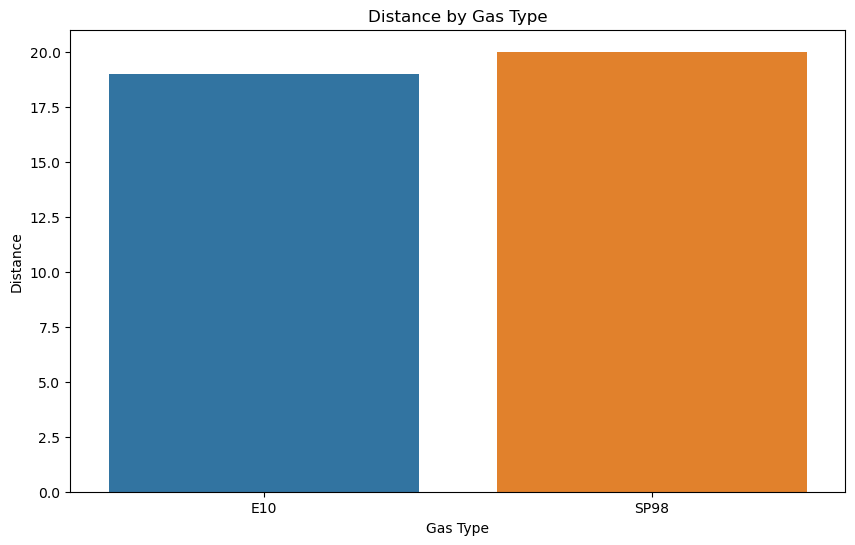

In [38]:

plt.figure(figsize=(10, 6))
sns.barplot(x='gas_type', y='distance', data=df, ci=None)
plt.title('Distance by Gas Type')
plt.xlabel('Gas Type')
plt.ylabel('Distance')
plt.show()


/var/folders/2k/4xrmmln9749_gpnkt8_q2md80000gn/T/ipykernel_28177/3490558016.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gas_type', y='speed', data=df, ci=None)


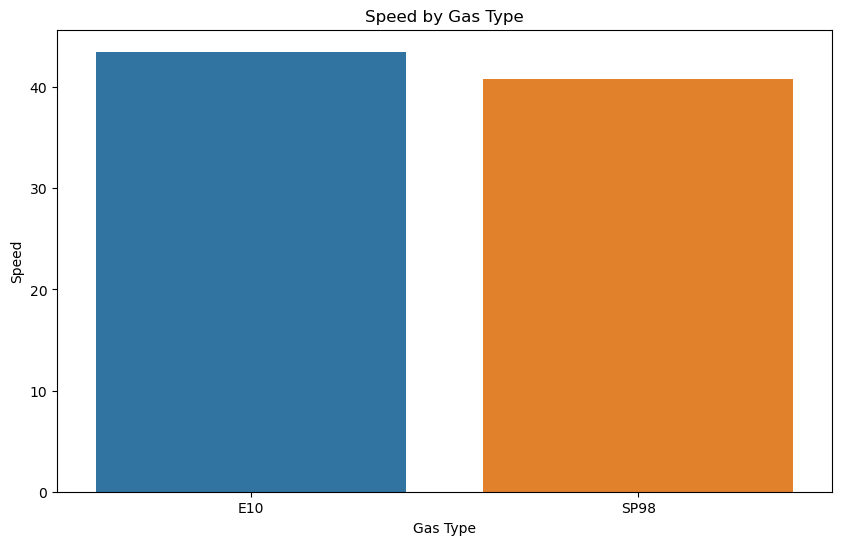

In [39]:

plt.figure(figsize=(10, 6))
sns.barplot(x='gas_type', y='speed', data=df, ci=None)
plt.title('Speed by Gas Type')
plt.xlabel('Gas Type')
plt.ylabel('Speed')
plt.show()

In [40]:
#Looks like SP98 performs better in distance while E10 does better in speed. 

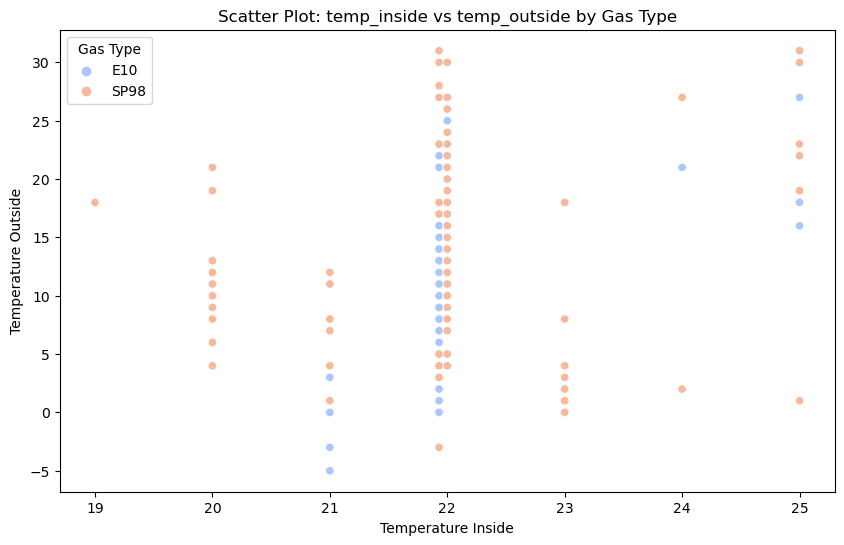

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp_inside', y='temp_outside', hue='gas_type', palette='coolwarm')
plt.title('Scatter Plot: temp_inside vs temp_outside by Gas Type')
plt.xlabel('Temperature Inside')
plt.ylabel('Temperature Outside')
plt.legend(title='Gas Type')
plt.show()

So far based on the exploration it is not clear which gas is better so we do an hypothesis: 


In [37]:
## Let's do a Statistical Analysis:


In [47]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind



In [48]:
gas_type98 = df[df['gas_type'] == 'SP98']['consume']
gas_type10 = df[df['gas_type'] == 'E10']['consume']

In [50]:
t_stat, p_value = ttest_ind(gas_type98, gas_type10)

print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')


T-test results: t-statistic = 0.45194621830499015, p-value = 0.6515615775239768


In [51]:

if p_value < 0.05:
    print('There is a significant difference in fuel consumption between gas types.')
    if t_stat < 0:
        print('Gas type SP98 has lower consumption than E10.')
    else:
        print('Gas type E10 has lower consumption than SP98.')
else:
    print('There is no significant difference in fuel consumption between gas types.')


There is no significant difference in fuel consumption between gas types.


We do a regression model to have more insights on the data: 

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [55]:
features = ['distance', 'speed', 'temp_inside', 'temp_outside', 'gas_type']
X = df[features]
y = df['consume']

In [56]:
#hot encode gas type: 
X = pd.get_dummies(X, columns=['gas_type'], drop_first=True)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [68]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [69]:
# Model validation y_train - y_pred_train
ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train)) # NOOOOOOOOO! y_train - y_pred_train
ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test)) # NOOOOOOOOO! y_test - y_pred_test

MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

RMSE_train = np.sqrt(MSE_train)
RMSE_test  = np.sqrt(MSE_test)

MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

pd.options.display.float_format = '{:.2f}'.format
performance



,Error_metric,Train,Test
0,Mean error,27.02,4.64
1,Mean absolute error,37.67,10.52
2,Mean squared error,205750.31,1134.19
3,Root mean squared error,453.60,33.68
4,Mean absolute percentual error,11.81,7.13
5,R2,-0.00,-0.05


In [73]:
X_test

,distance,speed,temp_inside,temp_outside,gas_type_SP98
271,19.60,32,22.00,18,0
46,19.60,32,21.93,7,1
167,19.60,40,21.93,6,0
42,19.60,37,21.93,6,0
349,19.60,46,22.00,16,1
...,...,...,...,...,...
3,19.60,36,21.93,14,0
18,19.60,39,21.93,8,0
93,19.60,43,21.93,10,1
108,19.60,36,21.00,4,1


In [75]:
y_pred_test = model.predict(X_test)

# Calculate RMSE for SP98
test_indices_sp98 = X_test['gas_type_SP98'] == 1
test_rmse_sp98 = np.sqrt(mean_squared_error(y_test[test_indices_sp98], y_pred_test[test_indices_sp98]))

# Calculate RMSE for E10
test_indices_e10 = X_test['gas_type_SP98'] == 0
test_rmse_e10 = np.sqrt(mean_squared_error(y_test[test_indices_e10], y_pred_test[test_indices_e10]))

# Compare RMSE values for both fuel types on the testing set
if test_rmse_sp98 < test_rmse_e10:
    better_fuel = 'SP98'
else:
    better_fuel = 'E10'

print("Better Fuel Type:", better_fuel)

Better Fuel Type: SP98


The best fuel is SP98! 